In [2]:
import torch
print(torch.__version__)

1.10.0


In [5]:
import torchvision
torchvision.__version__

'0.11.1'

In [11]:
import torch.nn as nn
kernel_size=2
# 定义卷积层
conv1 = nn.Sequential(
    nn.Conv2d(1,16,5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size), # 经过池化层处理，维度为
    nn.Conv2d(16,14,14) 
    )

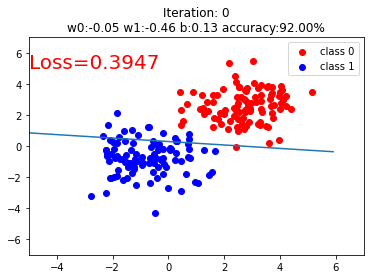

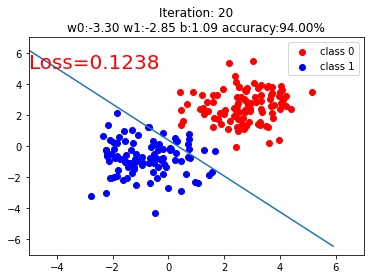

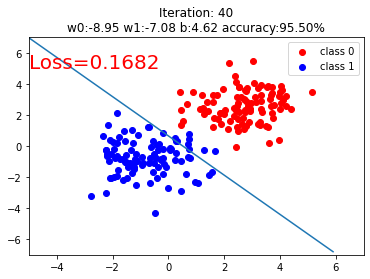

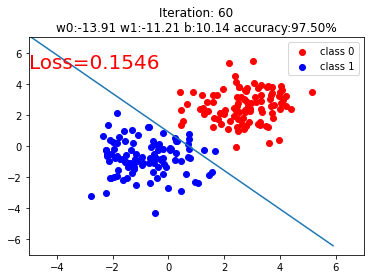

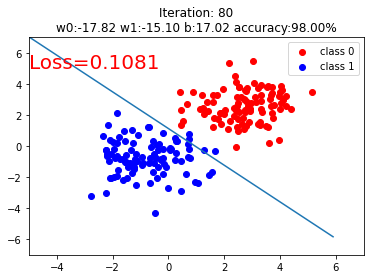

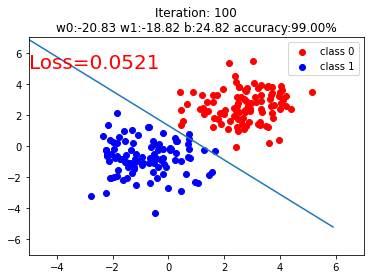

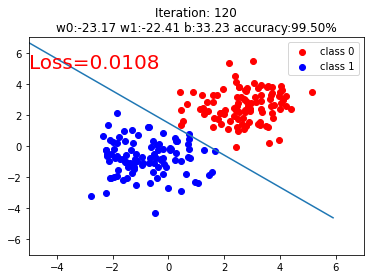

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(10)

# ============================== Step 1/5: 生成数据 ===================================
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
x0 = torch.normal(mean_value * n_data, 1) + bias    # 类别0 数据 shape=(100, 2)
y0 = torch.zeros(sample_nums)                       # 类别0 标签 shape=(100, 1)
x1 = torch.normal(-mean_value * n_data, 1) + bias   # 类别1 数据 shape=(100, 2)
y1 = torch.ones(sample_nums)                        # 类别1 标签 shape=(100, 1)
train_x = torch.cat((x0, x1), 0)
train_y = torch.cat((y0, y1), 0)


# ============================== Step 2/5: 选择模型 ===================================
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.features(x)
        x = self.sigmoid(x)
        return x


lr_net = LR()   # 实例化逻辑回归模型

# ============================== Step 3/5: 选择损失函数 ================================
loss_fn = nn.BCELoss()  # 二分类交叉熵损失 Binary Cross Entropy Loss

# ============================== Step 4/5: 选择优化器 ==================================
lr = 0.01   # 学习率
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)    # 随机梯度下降

# ============================== Step 5/5: 模型训练 ====================================
for iteration in range(1000):

    # 前向传播
    y_pred = lr_net(train_x)

    # 计算 loss
    loss = loss_fn(y_pred.squeeze(), train_y)

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 绘图
    if iteration % 20 == 0:

        mask = y_pred.ge(0.5).float().squeeze()  # 以 0.5 为阈值进行分类
        correct = (mask == train_y).sum()   # 计算正确预测的样本个数
        acc = correct.item() / train_y.size(0)   # 计算分类准确率

        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')

        w0, w1 = lr_net.features.weight[0]
        w0, w1 = float(w0.item()), float(w1.item())
        plot_b = float(lr_net.features.bias[0].item())
        plot_x = np.arange(-6, 6, 0.1)
        plot_y = (-w0 * plot_x - plot_b) / w1

        plt.xlim(-5, 7)
        plt.ylim(-7, 7)
        plt.plot(plot_x, plot_y)

        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.title("Iteration: {}\nw0:{:.2f} w1:{:.2f} b:{:.2f} accuracy:{:.2%}".format(iteration, w0, w1, plot_b, acc))
        plt.legend()

        plt.show()
        plt.pause(0.5)

        if acc > 0.99:
            break